In [5]:
import os

import torch
import matplotlib.pyplot as plt
from torchvision.io import write_png
from datasets.posetrack21 import PoseTrack21
from utilities.utilities import show_heatmaps, show_image
from models.head import MaskHead

In [51]:
device = "cpu"
dataset_root_dir = "/home/junfeng/datasets/PoseTrack21"
dataset_train = PoseTrack21(
    root_dir=dataset_root_dir,
    set="train",
)

dataset_test = PoseTrack21(
    root_dir=dataset_root_dir,
    set="test",
)

print(len(dataset_train))
print(len(dataset_test))

593
170


In [32]:
def show_combined_heatmaps(heatmaps):
    combined_heatmaps = torch.sum(heatmaps, dim=0)
    plt.imshow(combined_heatmaps,cmap='hot')
    plt.show()

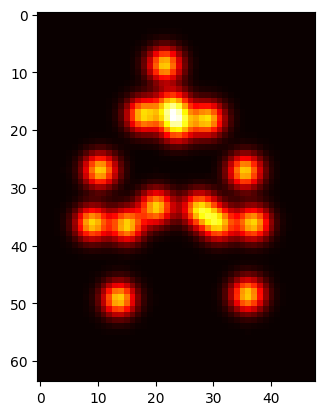

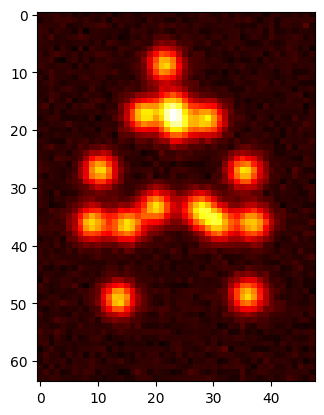

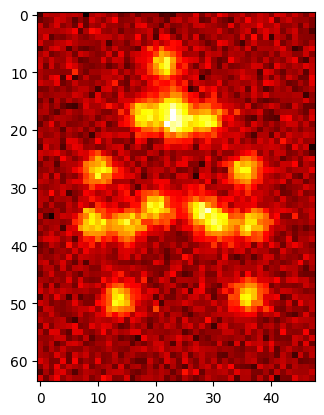

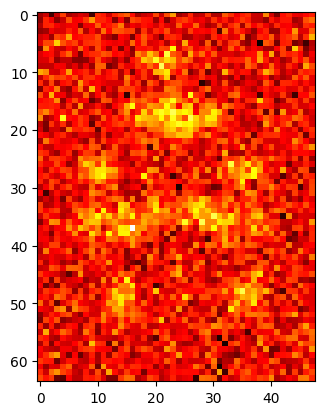

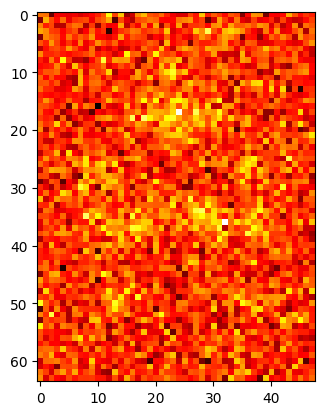

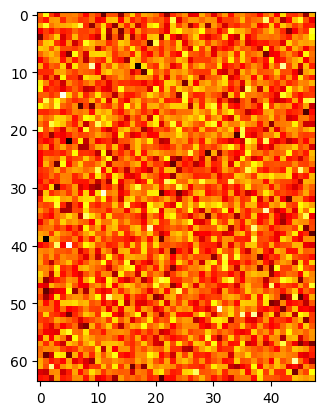

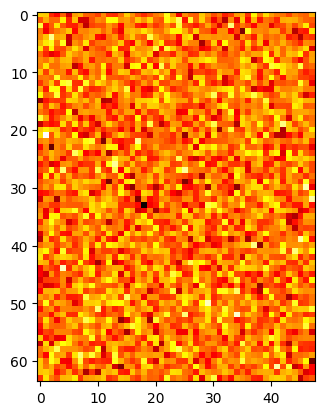

In [73]:
head = MaskHead()
step_list = [0, 10, 50, 100, 500, 999]
for video, video_transformed, expanded_bbox, keypoints, keypoints_transformed, heatmaps, image_id, track_id in dataset_test.get_for_eval(10):
    show_combined_heatmaps(heatmaps)
    heatmaps = heatmaps.unsqueeze(0)
    for step in step_list:
        _ts = torch.tensor(step, device=device).repeat(1, 1)
        noised_heatmaps = head._add_noise(heatmaps, _ts)
        show_combined_heatmaps(noised_heatmaps.squeeze(0))
    break